In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [125]:
df = pd.read_csv("/workspaces/Gupir11-machine-learning/data/processed/df_diabetes")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


## SPLIT

In [126]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18)

## Modelado

In [128]:
xgb = XGBClassifier(n_estimators=200,
                    learning_rate=0.1,
                    random_state=18,
                    use_label_encoder=False,
                    eval_metric='mlogloss')
ada = AdaBoostClassifier(n_estimators=500,
                         learning_rate=0.7,
                         random_state=18)

## Entrenamiento

In [129]:
ada.fit(X_train, y_train)

,estimator,None
,n_estimators,500
,learning_rate,0.7
,algorithm,'deprecated'
,random_state,18


In [130]:
xgb.fit(X_train, y_train)

/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [11:38:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [131]:
ada_y_pred_test = ada.predict(X_test)
xgb_y_pred_test = xgb.predict(X_test)
ada_y_pred_train = ada.predict(X_train)
xgb_y_pred_train = xgb.predict(X_train)

In [132]:
accuracy_train = (accuracy_score(y_train, ada_y_pred_train),
                  accuracy_score(y_train, xgb_y_pred_train))
accuracy_test = (accuracy_score(y_test, ada_y_pred_test),
                 accuracy_score(y_test, xgb_y_pred_test))

accuracy = pd.DataFrame(data=[accuracy_train, accuracy_test],
                        columns=['AdaBoost', 'XGBoost'],
                        index=['Train set', 'Test set'])

accuracy

,AdaBoost,XGBoost
Train set,0.811075,1.000000
Test set,0.714286,0.668831


AdaBoost funciona mejor  porque mantiene un equilibrio entre aprender y generalizar, mientras que XGBoost se pasa de flexible y termina sobreajustando por lo cual se va a trabajar con hiperparametros para buscar mejorarlo.

## Hiperparametrizacion

In [133]:
param_dist = {'n_estimators': [3, 5, 10, 35],
              'learning_rate': [0.01, 0.05, 0.1, 0.2],
              'max_depth': [1, 2, 3],
              'gamma': [0, 0.1, 0.5, 1, 2],
              'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
              'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0, 2.0]}


random_search = RandomizedSearchCV(estimator=xgb,
                                   param_distributions=param_dist,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=5,
                                   verbose=1,
                                   random_state=18,
                                   n_jobs=-1)

In [134]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [11:38:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [11:38:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [11:38:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [11:38:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/trainin

,estimator,"XGBClassifier...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.6, 0.7, ...], 'gamma': [0, 0.1, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [1, 2, ...], ...}"
,n_iter,50
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,18
,error_score,nan


In [135]:
random_search.best_score_

np.float64(0.783406637345062)

In [136]:
random_search.best_params_

{'subsample': 0.5,
 'n_estimators': 35,
 'max_depth': 1,
 'learning_rate': 0.1,
 'gamma': 2,
 'colsample_bytree': 0.6}

In [137]:
best_model = random_search.best_estimator_
best_model

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.6
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [140]:
y_pred = best_model.predict(X_test)

In [146]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.7207792207792207

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.71      0.93      0.80        95
           1       0.77      0.39      0.52        59

    accuracy                           0.72       154
   macro avg       0.74      0.66      0.66       154
weighted avg       0.73      0.72      0.69       154



El boosting luego de la hiperparametrizacion tiene una mejora notable ya que deja de tener overfiting en el train y al mmismo tiempo mejora tambien el test. aun asi el AdaBoosting obtiene mejores resultados.

## Comparacion de modelos

### ÁRBOLES DE DECISIÓN
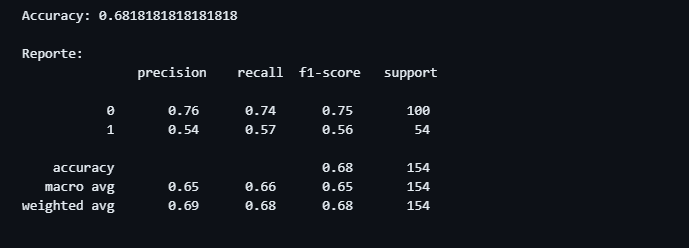

###  BOSQUE ALEATORIO
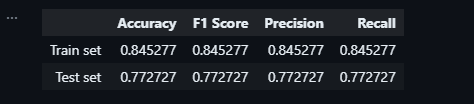

###  BOOSTING
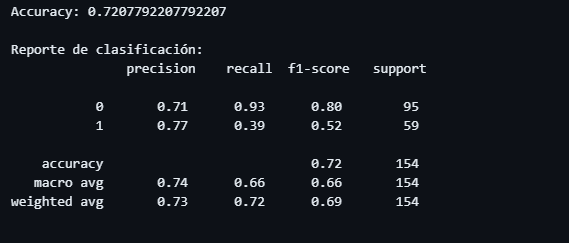

### conclusion de la comparacion

Árbol de decisión: el más básico y el más flojo.
Boosting: mejora algo, pero sigue fallando en los positivos.
Random Forest: el más estable, el más preciso y claramente el que mejor resultado muestra.

Es el que dio el mejor equilibrio entre precisión, recall y estabilidad.
Detecta mejor los casos positivos que el árbol simple y es más consistente que el boosting, 
igualmente en el AdaBoost, obtuvimos un resultado cercano y es el segundo mejor en prediccion.